Training time: 0.38975977897644043 seconds
Accuracy =  90.66666666666666 %
Precision =  0.9042610090925298
Recall =  0.9104072398190045
F1-score =  0.9058464849354376


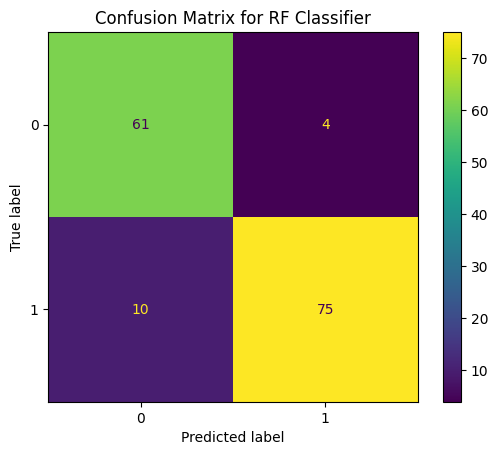

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        65
           1       0.95      0.88      0.91        85

    accuracy                           0.91       150
   macro avg       0.90      0.91      0.91       150
weighted avg       0.91      0.91      0.91       150



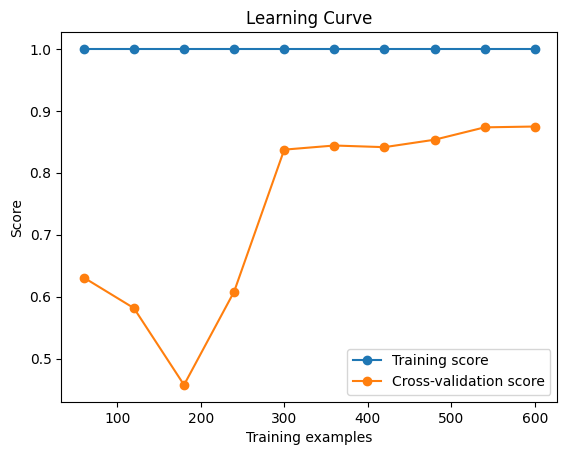

In [3]:
import pandas as pd
import numpy as np

import warnings
# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)
df = pd.read_csv(r"C:\Users\musab\desktop\ht\htOld\dataset\hyperthyroidism3_FinalDataSet_April.csv", encoding='latin-1')

df.dropna(inplace=True)

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values  
import time
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
start_time = time.time()
random_forest.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

print(f"Training time: {training_time} seconds")

# y_test = y_test - 1

y_pred = random_forest.predict(X_test)

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
ConfusionMatrixDisplay
)


print("Accuracy = ", accuracy_score(y_test, y_pred) * 100, "%")
print("Precision = ", precision_score(y_test, y_pred, average='macro'))
print("Recall = ", recall_score(y_test, y_pred, average='macro'))
print("F1-score = ", f1_score(y_test, y_pred, average='macro'))

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_train))
disp.plot()
plt.title('Confusion Matrix for RF Classifier')
plt.show()

print("Classification Report")
print(classification_report(y_test, y_pred))

train_sizes, train_scores, test_scores = learning_curve(random_forest, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()


--- Model Training (Random Forest) ---
Training Wall Time: 0.3427 seconds
Training CPU Time (User): 0.3281 seconds
Training CPU Time (System): 0.0156 seconds
Memory RSS after training: 243.74 MB

--- Model Prediction (Random Forest) ---
Prediction Wall Time (for 150 samples): 0.0160 seconds
Prediction CPU Time (User): 0.0156 seconds
Prediction CPU Time (System): 0.0000 seconds

--- Model Evaluation (Random Forest) ---
Accuracy = 90.67 %
Precision (Macro) = 0.9043
Recall (Macro) = 0.9104
F1-score (Macro) = 0.9058

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        65
           1       0.95      0.88      0.91        85

    accuracy                           0.91       150
   macro avg       0.90      0.91      0.91       150
weighted avg       0.91      0.91      0.91       150


--- Model Complexity (Random Forest) ---
Number of Trees (n_estimators): 100
Min Tree Depth: 7
Max Tree Depth: 15
Mean Tree Depth

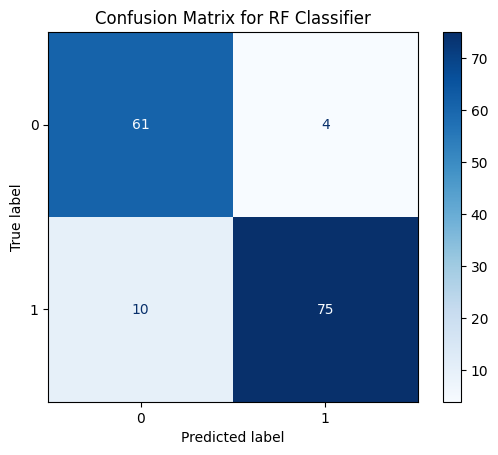


Displaying Learning Curve...


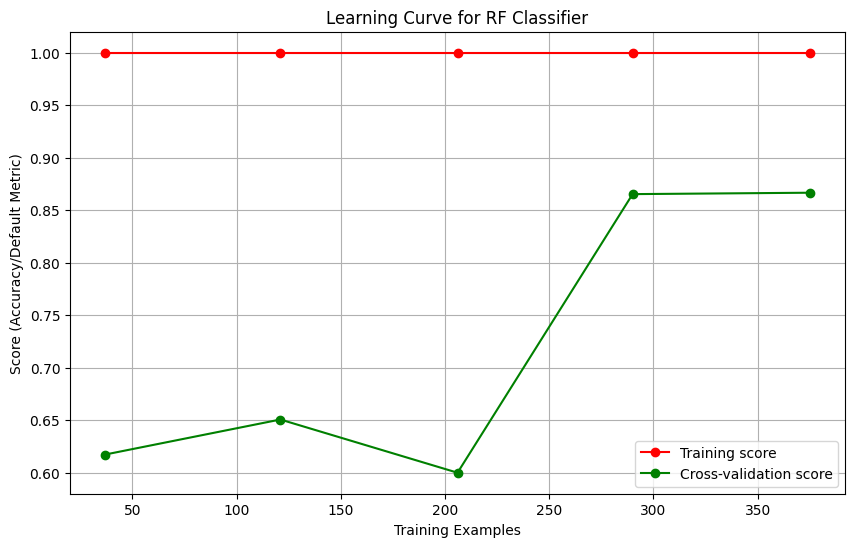


Displaying Feature Importances...


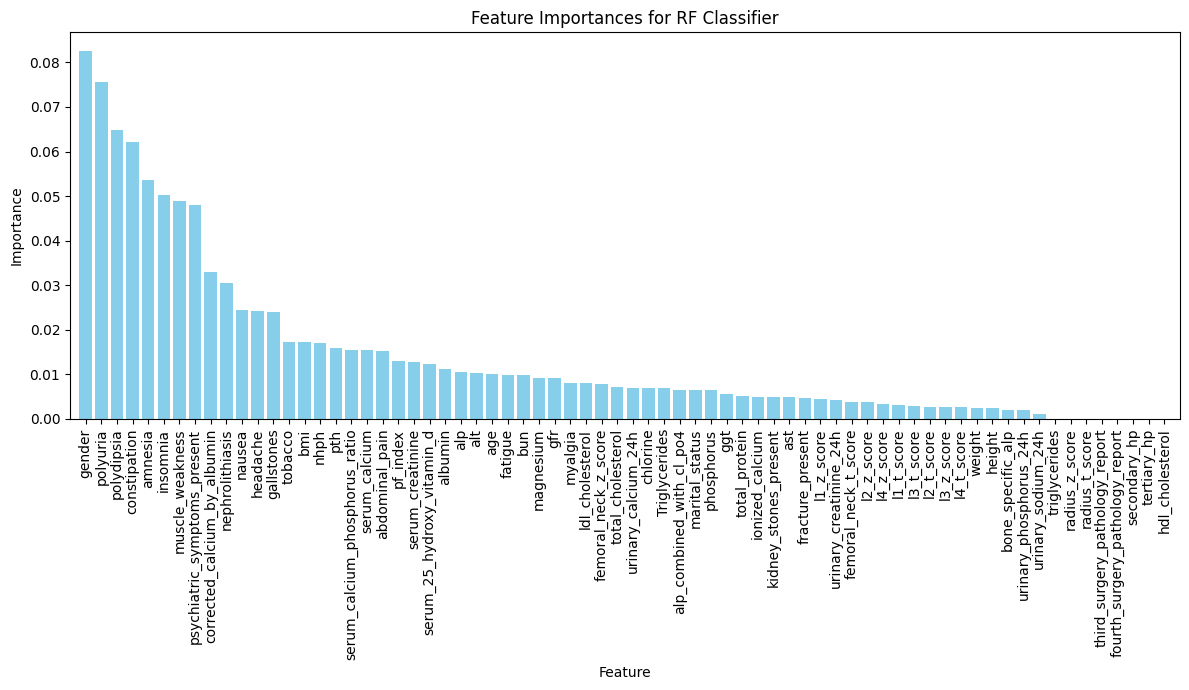


Displaying Histogram of Tree Depths...


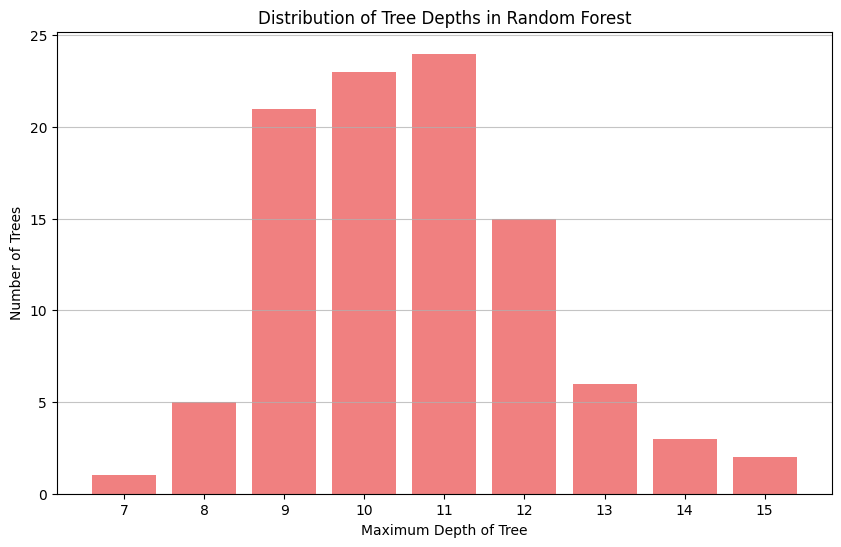


--- Generating Visualizations for Collected Metrics (Random Forest) ---


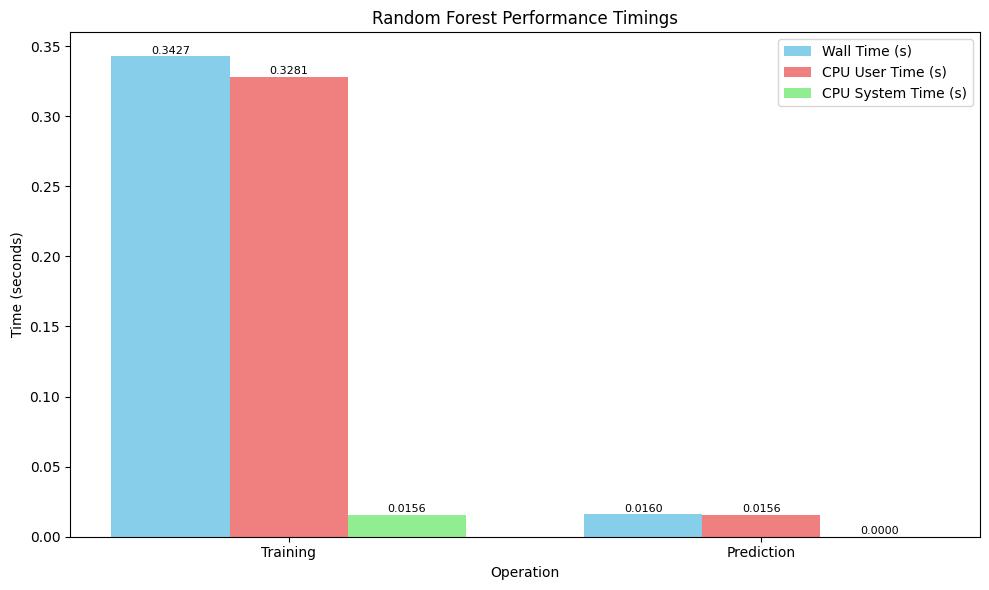

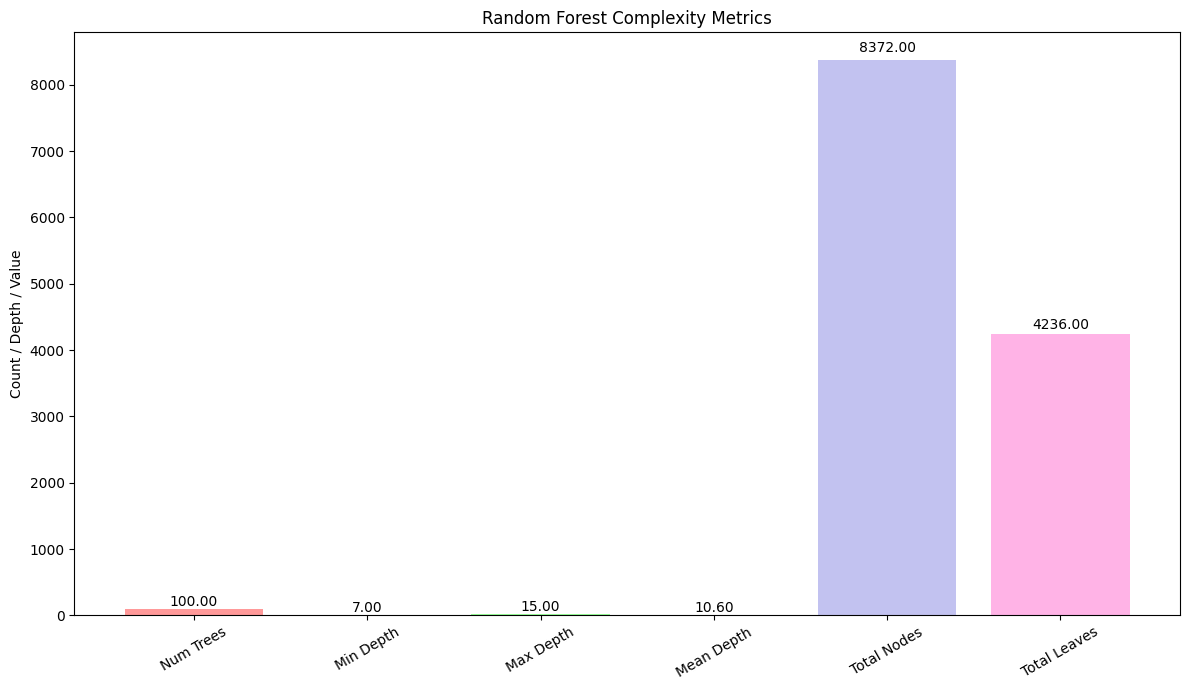

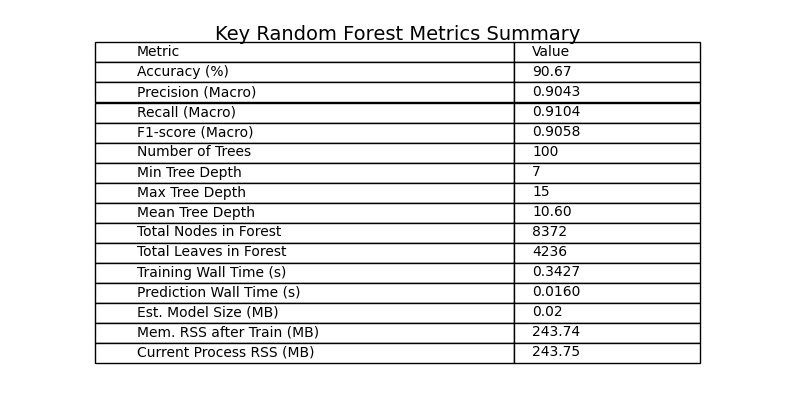


--- Analysis Complete ---


In [6]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import warnings
import sys # For model object size

# Attempt to import psutil for CPU and memory stats
try:
    import psutil
    psutil_available = True
    process = psutil.Process() # Get current process
except ImportError:
    psutil_available = False
    print("psutil library not found. CPU and memory usage stats will not be available.")
    print("To install psutil, run: pip install psutil")

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

# --- 0. Initialize Metrics Storage ---
# Dictionary to store all metrics for later visualization
all_metrics = {}

# --- 1. Load Data ---
# !!! IMPORTANT: Make sure this path is correct for your system !!!
df = pd.read_csv(r"C:\Users\musab\desktop\ht\htOld\dataset\hyperthyroidism3_FinalDataSet_April.csv", encoding='latin-1')

df.dropna(inplace=True)

if df.empty:
    print("DataFrame is empty after dropping NaNs. Exiting.")
    sys.exit()

# Assuming the first column is the target and the rest are features
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

# Convert feature names to strings, handle potential non-string column names
feature_names = [str(col) for col in df.columns[1:]]
# Convert class names from y to strings (used for confusion matrix display_labels)
class_names = [str(cls) for cls in np.unique(y)]


# --- 2. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 3. Initialize Model ---
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# --- 4. Train Model and Measure Resources ---
print("\n--- Model Training (Random Forest) ---")
training_start_time_wall = time.time()
if psutil_available:
    cpu_times_before_train = process.cpu_times()
    mem_info_before_train = process.memory_info().rss

random_forest.fit(X_train, y_train)

training_end_time_wall = time.time()
if psutil_available:
    cpu_times_after_train = process.cpu_times()
    mem_info_after_train = process.memory_info().rss

all_metrics['training_wall_time'] = training_end_time_wall - training_start_time_wall
print(f"Training Wall Time: {all_metrics['training_wall_time']:.4f} seconds")

if psutil_available:
    all_metrics['training_cpu_time_user'] = cpu_times_after_train.user - cpu_times_before_train.user
    all_metrics['training_cpu_time_system'] = cpu_times_after_train.system - cpu_times_before_train.system
    all_metrics['memory_rss_after_training_mb'] = mem_info_after_train / (1024**2)
    print(f"Training CPU Time (User): {all_metrics['training_cpu_time_user']:.4f} seconds")
    print(f"Training CPU Time (System): {all_metrics['training_cpu_time_system']:.4f} seconds")
    print(f"Memory RSS after training: {all_metrics['memory_rss_after_training_mb']:.2f} MB")
else: # Default values if psutil not available
    all_metrics['training_cpu_time_user'] = 0
    all_metrics['training_cpu_time_system'] = 0
    all_metrics['memory_rss_after_training_mb'] = 0


# --- 5. Make Predictions and Measure Resources ---
print("\n--- Model Prediction (Random Forest) ---")
prediction_start_time_wall = time.time()
if psutil_available:
    cpu_times_before_predict = process.cpu_times()

y_pred = random_forest.predict(X_test)

prediction_end_time_wall = time.time()
if psutil_available:
    cpu_times_after_predict = process.cpu_times()

all_metrics['prediction_wall_time'] = prediction_end_time_wall - prediction_start_time_wall
print(f"Prediction Wall Time (for {len(X_test)} samples): {all_metrics['prediction_wall_time']:.4f} seconds")

if psutil_available:
    all_metrics['prediction_cpu_time_user'] = cpu_times_after_predict.user - cpu_times_before_predict.user
    all_metrics['prediction_cpu_time_system'] = cpu_times_after_predict.system - cpu_times_before_predict.system
    print(f"Prediction CPU Time (User): {all_metrics['prediction_cpu_time_user']:.4f} seconds")
    print(f"Prediction CPU Time (System): {all_metrics['prediction_cpu_time_system']:.4f} seconds")
else: # Default values
    all_metrics['prediction_cpu_time_user'] = 0
    all_metrics['prediction_cpu_time_system'] = 0

# --- 6. Evaluate Model ---
print("\n--- Model Evaluation (Random Forest) ---")
all_metrics['accuracy'] = accuracy_score(y_test, y_pred) * 100
all_metrics['precision_macro'] = precision_score(y_test, y_pred, average='macro', zero_division=0)
all_metrics['recall_macro'] = recall_score(y_test, y_pred, average='macro', zero_division=0)
all_metrics['f1_score_macro'] = f1_score(y_test, y_pred, average='macro', zero_division=0)

print(f"Accuracy = {all_metrics['accuracy']:.2f} %")
print(f"Precision (Macro) = {all_metrics['precision_macro']:.4f}")
print(f"Recall (Macro) = {all_metrics['recall_macro']:.4f}")
print(f"F1-score (Macro) = {all_metrics['f1_score_macro']:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# --- 7. Model Complexity Statistics ---
print("\n--- Model Complexity (Random Forest) ---")
all_metrics['num_trees'] = random_forest.n_estimators
print(f"Number of Trees (n_estimators): {all_metrics['num_trees']}")

if hasattr(random_forest, 'estimators_') and random_forest.estimators_:
    tree_depths = [estimator.tree_.max_depth for estimator in random_forest.estimators_]
    tree_node_counts = [estimator.tree_.node_count for estimator in random_forest.estimators_]
    tree_leaf_counts = [estimator.tree_.n_leaves for estimator in random_forest.estimators_]

    all_metrics['min_tree_depth'] = np.min(tree_depths)
    all_metrics['max_tree_depth'] = np.max(tree_depths)
    all_metrics['mean_tree_depth'] = np.mean(tree_depths)
    all_metrics['std_dev_tree_depth'] = np.std(tree_depths)

    all_metrics['total_nodes_forest'] = np.sum(tree_node_counts)
    all_metrics['mean_nodes_per_tree'] = np.mean(tree_node_counts)
    all_metrics['total_leaves_forest'] = np.sum(tree_leaf_counts)
    all_metrics['mean_leaves_per_tree'] = np.mean(tree_leaf_counts)

    print(f"Min Tree Depth: {all_metrics['min_tree_depth']}")
    print(f"Max Tree Depth: {all_metrics['max_tree_depth']}")
    print(f"Mean Tree Depth: {all_metrics['mean_tree_depth']:.2f}")
    print(f"Std Dev Tree Depth: {all_metrics['std_dev_tree_depth']:.2f}")
    print(f"Total Nodes in Forest: {all_metrics['total_nodes_forest']}")
    print(f"Mean Nodes per Tree: {all_metrics['mean_nodes_per_tree']:.2f}")
    print(f"Total Leaves in Forest: {all_metrics['total_leaves_forest']}")
    print(f"Mean Leaves per Tree: {all_metrics['mean_leaves_per_tree']:.2f}")
else:
    print("Estimators not available or empty. Cannot calculate detailed tree stats.")
    keys_to_default = ['min_tree_depth', 'max_tree_depth', 'mean_tree_depth', 'std_dev_tree_depth',
                       'total_nodes_forest', 'mean_nodes_per_tree', 'total_leaves_forest', 'mean_leaves_per_tree']
    for key in keys_to_default:
        all_metrics[key] = 0


# Estimating model size
model_size_bytes = sys.getsizeof(random_forest)
if hasattr(random_forest, 'estimators_') and random_forest.estimators_:
    model_size_bytes += sys.getsizeof(random_forest.estimators_)
    for estimator in random_forest.estimators_:
        model_size_bytes += sys.getsizeof(estimator)
        if hasattr(estimator, 'tree_') and estimator.tree_:
            model_size_bytes += sys.getsizeof(estimator.tree_)

all_metrics['estimated_model_size_kb'] = model_size_bytes / 1024
all_metrics['estimated_model_size_mb'] = model_size_bytes / (1024**2)
print(f"Estimated Model Object Size in Memory: {all_metrics['estimated_model_size_kb']:.2f} KB ({all_metrics['estimated_model_size_mb']:.2f} MB)")

if psutil_available:
    all_metrics['current_process_rss_mb'] = process.memory_info().rss / (1024**2)
    all_metrics['current_process_vms_mb'] = process.memory_info().vms / (1024**2)
    print(f"Current Process RSS Memory: {all_metrics['current_process_rss_mb']:.2f} MB")
    print(f"Current Process VMS Memory: {all_metrics['current_process_vms_mb']:.2f} MB")
else:
    all_metrics['current_process_rss_mb'] = 0
    all_metrics['current_process_vms_mb'] = 0

# --- 8. Visualizations (Existing from User's RF Script) ---

# Confusion Matrix
print("\nDisplaying Confusion Matrix...")
try:
    if len(y_test) > 0 and len(y_pred) > 0:
        unique_labels_train = np.unique(y_train)
        unique_labels_test = np.unique(y_test)
        all_unique_labels = np.unique(np.concatenate((unique_labels_train, unique_labels_test, np.unique(y_pred))))
        # Use class_names if all_unique_labels is empty (e.g. single class in y_pred)
        display_labels_cm = all_unique_labels if len(all_unique_labels) > 0 else class_names

        conf_matrix = confusion_matrix(y_test, y_pred, labels=display_labels_cm if len(display_labels_cm)>0 else None)
        disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=display_labels_cm if len(display_labels_cm)>0 else ['N/A'])
        disp.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix for RF Classifier')
        plt.show()
    else:
        print("Skipping Confusion Matrix: y_test or y_pred is empty.")
except Exception as e:
    print(f"Could not plot Confusion Matrix: {e}")


# Learning Curve
print("\nDisplaying Learning Curve...")
try:
    if len(y) >= 5 : # cv=5
        n_splits_cv = min(5, len(np.unique(y)))
        if n_splits_cv < 2 :
            print(f"Skipping Learning Curve: Not enough unique classes in target variable for {n_splits_cv} splits (min 2 required).")
        else:
            train_sizes, train_scores, test_scores = learning_curve(
                random_forest, X, y, cv=n_splits_cv,
                n_jobs=-1,
                train_sizes=np.linspace(0.1, 1.0, 5)
            )
            plt.figure(figsize=(10, 6))
            plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
            plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
            plt.xlabel("Training Examples")
            plt.ylabel("Score (Accuracy/Default Metric)")
            plt.title("Learning Curve for RF Classifier")
            plt.legend(loc="best")
            plt.grid(True)
            plt.show()
    else:
        print("Skipping Learning Curve: Not enough samples in X or y for cross-validation (min 5 samples required for cv=5).")
except Exception as e:
    print(f"Could not plot Learning Curve: {e}")


# Feature Importances
print("\nDisplaying Feature Importances...")
if hasattr(random_forest, 'feature_importances_'):
    importances = random_forest.feature_importances_
    indices = np.argsort(importances)[::-1]
    all_metrics['feature_importances'] = importances # Store for potential future use

    plt.figure(figsize=(12, 7))
    plt.title("Feature Importances for RF Classifier")
    plt.bar(range(X.shape[1]), importances[indices], color="skyblue", align="center")
    if 'feature_names' in locals() and len(feature_names) == X.shape[1]:
         # Use actual feature names for ticks, ordered by importance
        plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
    else:
        plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.ylabel("Importance")
    plt.xlabel("Feature")
    plt.tight_layout()
    plt.show()
else:
    print("Feature importances not available for this classifier.")
    all_metrics['feature_importances'] = []


# Histogram of Tree Depths
print("\nDisplaying Histogram of Tree Depths...")
if 'tree_depths' in locals() and len(tree_depths) > 0:
    plt.figure(figsize=(10, 6))
    min_d, max_d = min(tree_depths), max(tree_depths)
    bins_hist = range(min_d, max_d + 2) if min_d != max_d else [min_d, min_d + 1]
    plt.hist(tree_depths, bins=bins_hist, align='left', rwidth=0.8, color='lightcoral')
    plt.title('Distribution of Tree Depths in Random Forest')
    plt.xlabel('Maximum Depth of Tree')
    plt.ylabel('Number of Trees')
    plt.xticks(range(min_d, max_d + 1) if min_d != max_d else [min_d])
    plt.grid(axis='y', alpha=0.75)
    plt.show()
elif 'min_tree_depth' in all_metrics : # Check if model was fit and depths were calculated
    print("Tree depths data available but list might be empty (e.g. n_estimators=0).")
else:
    print("Skipping Histogram of Tree Depths: No tree depth data available (e.g. model not fit or n_estimators=0).")


# --- 9. New Visualizations for Collected Metrics (Adapted for Random Forest) ---
print("\n--- Generating Visualizations for Collected Metrics (Random Forest) ---")

# Plot 1: Performance Timings (Same as DT)
fig_perf, ax_perf = plt.subplots(figsize=(10, 6))
time_categories = ['Training', 'Prediction']
wall_times = [all_metrics.get('training_wall_time', 0), all_metrics.get('prediction_wall_time', 0)]
cpu_user_times = [all_metrics.get('training_cpu_time_user', 0), all_metrics.get('prediction_cpu_time_user', 0)]
cpu_system_times = [all_metrics.get('training_cpu_time_system', 0), all_metrics.get('prediction_cpu_time_system', 0)]

bar_width = 0.25
index = np.arange(len(time_categories))

bar1 = ax_perf.bar(index - bar_width, wall_times, bar_width, label='Wall Time (s)', color='skyblue')
bar2 = ax_perf.bar(index, cpu_user_times, bar_width, label='CPU User Time (s)', color='lightcoral')
bar3 = ax_perf.bar(index + bar_width, cpu_system_times, bar_width, label='CPU System Time (s)', color='lightgreen')

ax_perf.set_xlabel('Operation')
ax_perf.set_ylabel('Time (seconds)')
ax_perf.set_title('Random Forest Performance Timings')
ax_perf.set_xticks(index)
ax_perf.set_xticklabels(time_categories)
ax_perf.legend()
for bar_group in [bar1, bar2, bar3]: # Add value labels
    for bar in bar_group:
        yval = bar.get_height()
        ax_perf.text(bar.get_x() + bar.get_width()/2.0, yval + 0.001 * (max(wall_times + cpu_user_times + cpu_system_times) if any(wall_times + cpu_user_times + cpu_system_times) else 1), f'{yval:.4f}', ha='center', va='bottom', fontsize=8)
fig_perf.tight_layout()
plt.show()


# Plot 2: Model Complexity for Random Forest
fig_comp_rf, ax_comp_rf = plt.subplots(figsize=(12, 7)) # Wider for more bars
complexity_metrics_names_rf = [
    'Num Trees', 'Min Depth', 'Max Depth',
    'Mean Depth', 'Total Nodes', 'Total Leaves'
]
complexity_values_rf = [
    all_metrics.get('num_trees', 0), all_metrics.get('min_tree_depth', 0), all_metrics.get('max_tree_depth', 0),
    all_metrics.get('mean_tree_depth', 0), all_metrics.get('total_nodes_forest', 0), all_metrics.get('total_leaves_forest', 0)
]
colors_rf = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#c2c2f0', '#ffb3e6']

bars_comp_rf = ax_comp_rf.bar(complexity_metrics_names_rf, complexity_values_rf, color=colors_rf)
ax_comp_rf.set_ylabel('Count / Depth / Value')
ax_comp_rf.set_title('Random Forest Complexity Metrics')
ax_comp_rf.tick_params(axis='x', rotation=30) # Rotate x labels for better fit
# Add value labels on top of bars
for bar in bars_comp_rf:
    yval = bar.get_height()
    ax_comp_rf.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01 * yval, f'{yval:.2f}', ha='center', va='bottom') # Display as float for mean depth
fig_comp_rf.tight_layout()
plt.show()


# Plot 3: Summary Table of Key Metrics for Random Forest
fig_table_rf, ax_table_rf = plt.subplots(figsize=(10, 5)) # Adjusted size
ax_table_rf.axis('tight')
ax_table_rf.axis('off')

table_data_rf = [
    ["Metric", "Value"],
    ["Accuracy (%)", f"{all_metrics.get('accuracy', 0):.2f}"],
    ["Precision (Macro)", f"{all_metrics.get('precision_macro', 0):.4f}"],
    ["Recall (Macro)", f"{all_metrics.get('recall_macro', 0):.4f}"],
    ["F1-score (Macro)", f"{all_metrics.get('f1_score_macro', 0):.4f}"],
    ["Number of Trees", f"{all_metrics.get('num_trees', 0)}"],
    ["Min Tree Depth", f"{all_metrics.get('min_tree_depth', 0)}"],
    ["Max Tree Depth", f"{all_metrics.get('max_tree_depth', 0)}"],
    ["Mean Tree Depth", f"{all_metrics.get('mean_tree_depth', 0):.2f}"],
    ["Total Nodes in Forest", f"{all_metrics.get('total_nodes_forest', 0)}"],
    ["Total Leaves in Forest", f"{all_metrics.get('total_leaves_forest', 0)}"],
    ["Training Wall Time (s)", f"{all_metrics.get('training_wall_time', 0):.4f}"],
    ["Prediction Wall Time (s)", f"{all_metrics.get('prediction_wall_time', 0):.4f}"],
    ["Est. Model Size (MB)", f"{all_metrics.get('estimated_model_size_mb', 0):.2f}"],
    ["Mem. RSS after Train (MB)", f"{all_metrics.get('memory_rss_after_training_mb', 0):.2f}"],
]
if psutil_available:
     table_data_rf.extend([
        ["Current Process RSS (MB)", f"{all_metrics.get('current_process_rss_mb', 0):.2f}"],
     ])

table_rf = ax_table_rf.table(cellText=table_data_rf, colLabels=None, cellLoc='left', loc='center', colWidths=[0.45, 0.2])
table_rf.auto_set_font_size(False)
table_rf.set_fontsize(10)
table_rf.scale(1.2, 1.2)
ax_table_rf.set_title('Key Random Forest Metrics Summary', fontsize=14, y=0.9) # Adjusted title position
plt.show()

print("\n--- Analysis Complete ---")
